In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [44]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [17]:
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [18]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot'
              ]

In [19]:
class_names[y_train[0]]

'Coat'

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense'

In [26]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06142778,  0.05810873, -0.03238044, ...,  0.01933776,
        -0.0168612 ,  0.01955616],
       [ 0.05129264,  0.06112602,  0.05642939, ..., -0.01192936,
         0.00617598, -0.06412534],
       [-0.03475124, -0.00387423,  0.05701073, ..., -0.03514002,
         0.06133497,  0.04476531],
       ...,
       [ 0.03611505,  0.03635384,  0.06817721, ..., -0.0659679 ,
        -0.05472234,  0.00956301],
       [-0.03271814, -0.05213554, -0.07052352, ...,  0.04792012,
         0.01548671, -0.01476442],
       [-0.06622685, -0.00148145,  0.01152319, ...,  0.0743327 ,
         0.00579467, -0.07125133]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

In [30]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = 'accuracy')

In [31]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7152 - accuracy: 0.7648 - val_loss: 0.4949 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4886 - accuracy: 0.8299 - val_loss: 0.4674 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4433 - accuracy: 0.8445 - val_loss: 0.4125 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4169 - accuracy: 0.8538 - val_loss: 0.4053 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3972 - accuracy: 0.8601 - val_loss: 0.4074 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3808 - accuracy: 0.8654 - val_loss: 0.3792 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3668 - accuracy: 0.8702 - val_loss: 0.3582 - val_accuracy:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

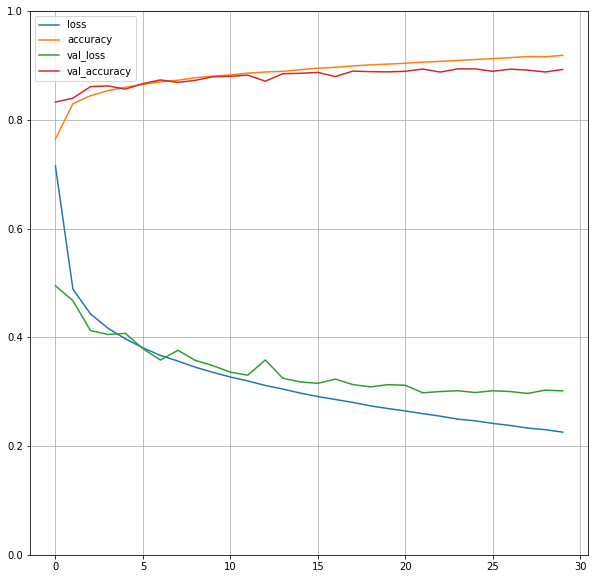

In [45]:
pd.DataFrame(history.history).plot(figsize = (10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 73.5671 - accuracy: 0.8313


[73.56714630126953, 0.8313000202178955]

Use the model to make predictions

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [39]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)